# **Importação das bibliotecas básicas**

In [1]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Exploração dos dados**


- Fonte: https://www.kaggle.com/laotse/credit-risk-dataset

In [ ]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [ ]:
base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [ ]:
base_credit.head(10)

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1
5         6  24904.064140  57.471607    15.498598        0
6         7  48430.359613  26.809132  5722.581981        0
7         8  24500.141984  32.897548  2971.003310        1
8         9  40654.892537  55.496853  4755.825280        0
9        10  25075.872771  39.776378  1409.230371        0

In [ ]:
#visualizar os ultimos registro
base_credit.tail()

clientid        income        age         loan  default
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

In [ ]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [ ]:
base_credit[base_credit['income'] >= 69995.685578	 ]

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [ ]:
base_credit[base_credit['loan'] <= 1.377630 ]

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

# **Visualização dos dados**

In [ ]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

Podemos fazer assim também!

In [ ]:
base_credit['default'].unique()

array([0, 1])

In [ ]:
base_credit['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

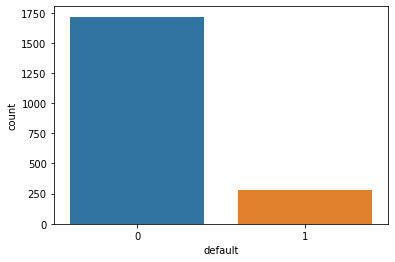

In [ ]:
sns.countplot(x = base_credit['default']);

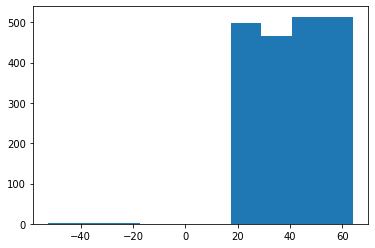

In [ ]:
plt.hist(x = base_credit['age']);

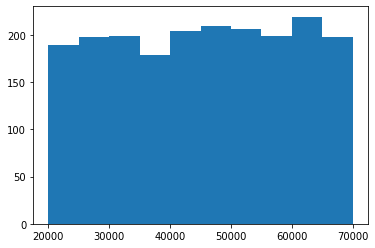

In [ ]:
plt.hist(x = base_credit['income']);

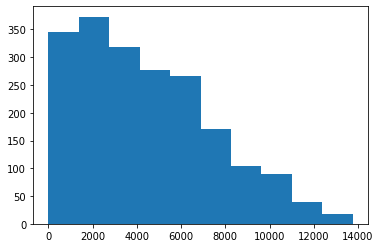

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

# **Tratamento de Valores Inconsistentes**

In [ ]:
base_credit.loc[base_credit['age'] < 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credit2 = base_credit.drop('age', axis =1)
base_credit2.head()

clientid        income         loan  default
0         1  66155.925095  8106.532131        0
1         2  34415.153966  6564.745018        0
2         3  57317.170063  8020.953296        0
3         4  42709.534201  6103.642260        0
4         5  66952.688845  8770.099235        1

In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age']<0].index)
base_credit3

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [ ]:
base_credit3.loc[base_credit3['age'] < 0]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
# Preencher os valores inconsistente manualmente


In [ ]:
# Preencher com a média
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [ ]:
base_credit['age'].mean()

40.80755937840458

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
base_credit.loc[base_credit['age'] < 0]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit.head(27)

clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  40.920000  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  40.920000  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0
26        27  63287.038908  40.920000  9595.286289        0

# **Tratamento de Valores Faltantes**

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit.loc[(base_credit['clientid'] == 29)|(base_credit['clientid'] == 31)|(base_credit['clientid'] == 32)]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [ ]:
# Podemos fazer assim também
base_credit.loc[base_credit['clientid'].isin([29,31,32])]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

# **Divisão entre Previsores e Classe**

In [ ]:
X_credit = base_credit.iloc[:,1:4].values

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(X_credit)

numpy.ndarray

In [ ]:
y_credit = base_credit.iloc[:, 4].values

In [ ]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(y_credit)

numpy.ndarray

# **Escalonamento dos atributos**

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

# Padronização (Standardisation)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [ ]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# **Base de dados do censo**
- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

# **Exploração dos dados**

In [ ]:
base_census = pd.read_csv('/content/census.csv')

In [ ]:
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [ ]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# **Visualizaçãp dos dados**

In [ ]:
base_census['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
base_census['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

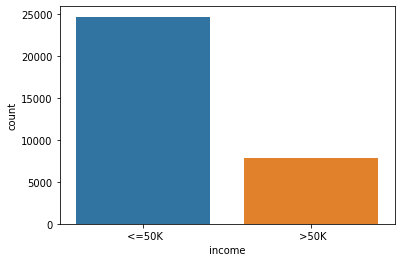

In [ ]:
#base de dados desbalanceada
sns.countplot(x = base_census['income']);

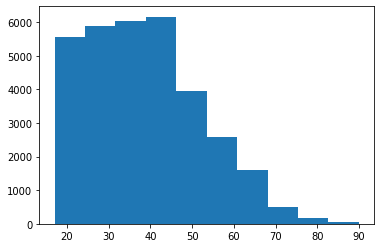

In [ ]:
plt.hist(x = base_census['age']);

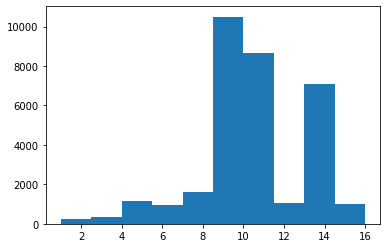

In [ ]:
plt.hist(x = base_census['education-num']);

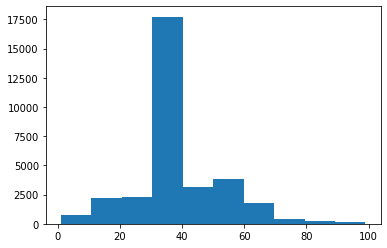

In [ ]:
plt.hist(x = base_census['hour-per-week']);

In [ ]:
grafico = px.treemap(base_census, path=['workclass','age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions = ['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions = ['workclass','occupation', 'relationship', 'income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions = ['education', 'income'])
grafico.show()

# **Divisão entre previsores e classe**

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census = base_census.iloc[:,0:14].values

In [ ]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
y_census =  base_census.iloc[:,14].values

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# **Tratamento de atributos categóricos**

# LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

# OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')


In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape

(32561, 108)

# **Escalonamento dos valores**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# **Divisão das bases em treinamento e teste**

In [ ]:
from sklearn.model_selection import train_test_split

# Credit data

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state= 0)

In [ ]:
X_credit_treinamento.shape

(1500, 3)

In [ ]:
y_credit_treinamento.shape

(1500,)

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

# Census

In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

# Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Base risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [ ]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle
with open('risco_credito.plk', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (1), garantias adequada (0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Base credi data - 93.80%

In [ ]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

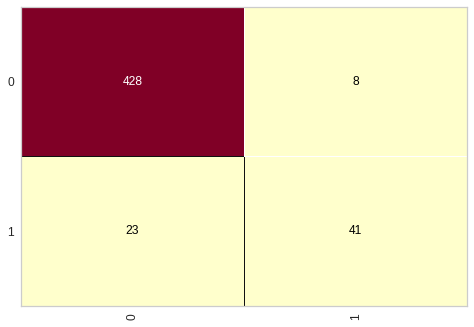

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



# Base census - 47.67%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

0.4767656090071648

0.4767656090071648

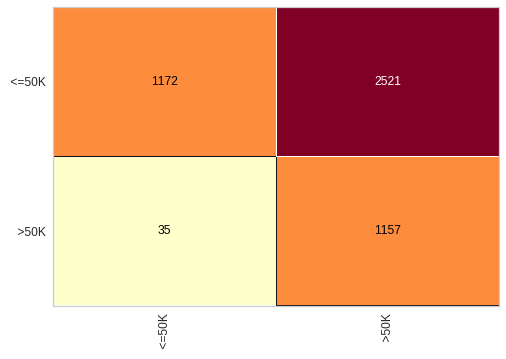

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# **Árvores de decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Base risco de crédito

In [ ]:
import pickle
with open('risco_credito.plk', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

NameError: ignored

In [ ]:
arvore_risco_credito.feature_importances_

In [ ]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names= arvore_risco_credito.classes_, filled = True)

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (1), garantias adequada (0), renda < 15 (0)

previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

# Base credit data - 98.20%
Depois de realizar o ajuste dos parâmetros do algoritmo 98.60%

In [42]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [43]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [44]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [53]:
# Fazendo ajuste dos parâmetros dos algoritmos
arvore_credit = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [54]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
accuracy_score(y_credit_teste, previsoes)

0.986

0.986

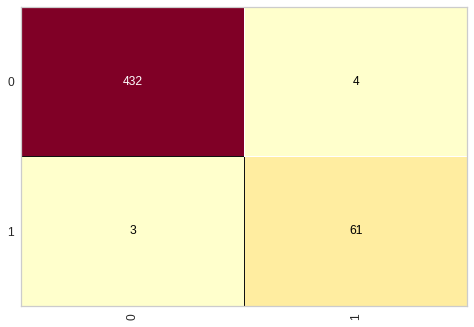

In [58]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [59]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



In [60]:
arvore_credit.classes_

array([0, 1])

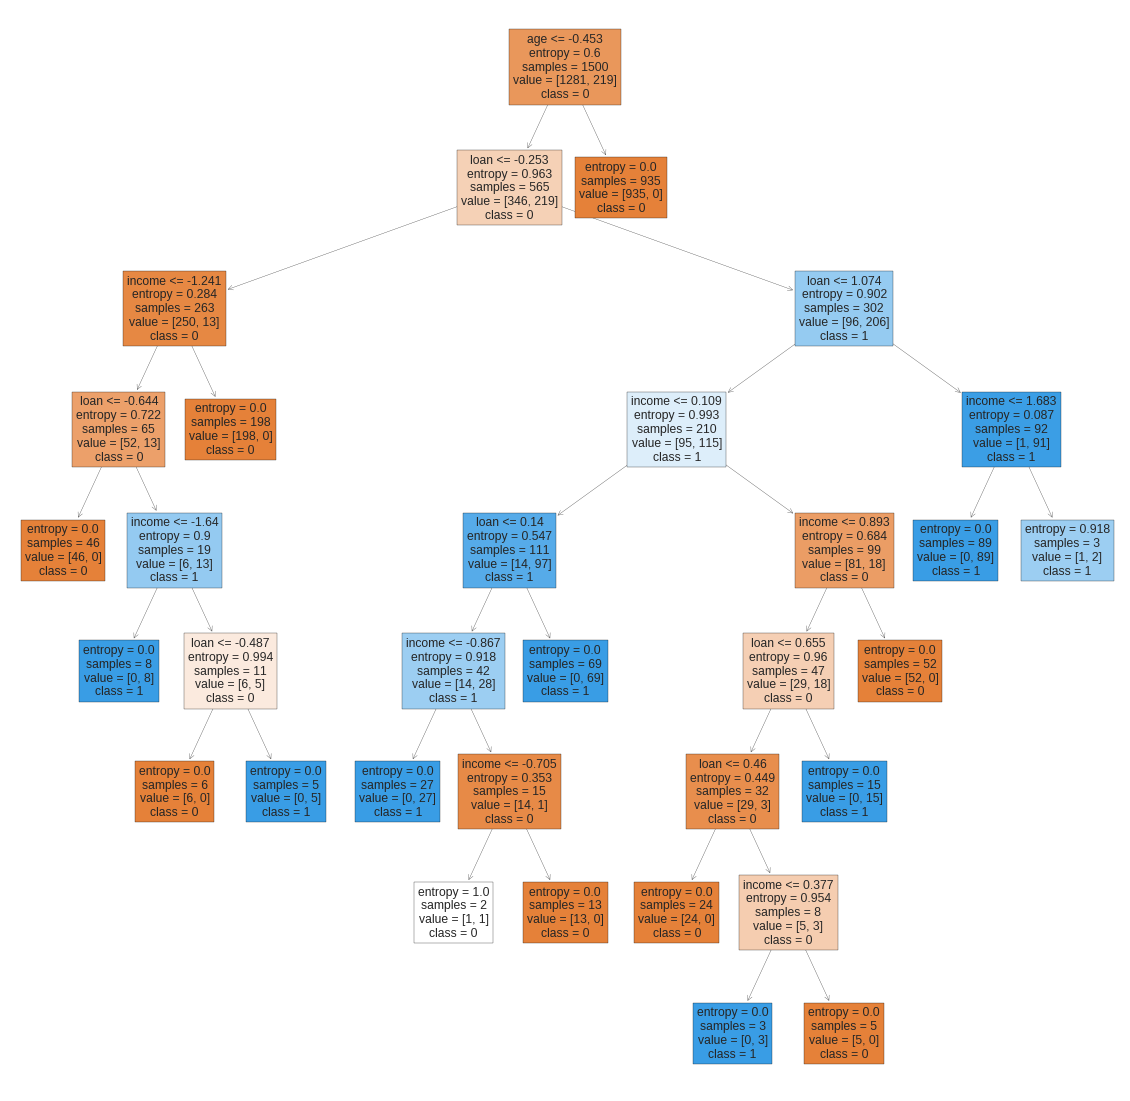

In [61]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

# Base census - 81.04%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

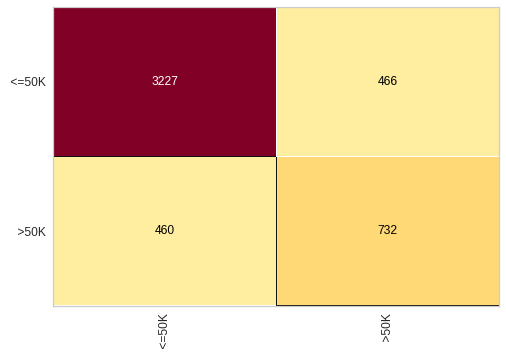

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Base credit data - 98.40%

In [79]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [80]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [81]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [87]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [88]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

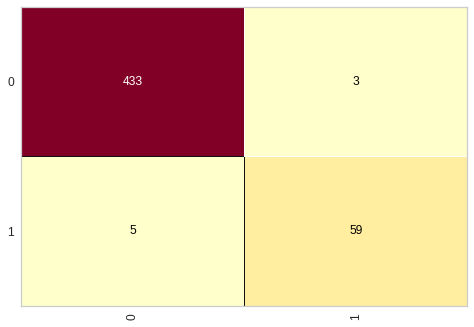

In [77]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [78]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# Base census - 85.07%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

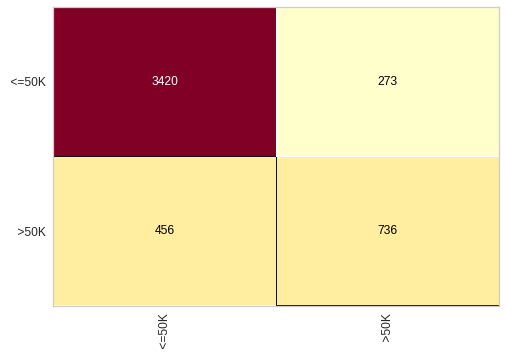

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



# **Regras**

In [ ]:
!pip install Orange3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.0 MB 2.5 MB/s 
     |████████████████████████████████| 2.5 MB 29.0 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 31.0 MB/s 
     |████████████████████████████████| 253 kB 36.0 MB/s 
     |████████████████████████████████| 992 kB 35.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 149 kB 47.9 MB/s 
     |████████████████████████████████| 492 kB 54.6 MB/s 
     |████████████████████████████████| 228 kB 49.3 MB/s 
     |████████████████████████████████| 8.3 MB 29.1 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 51 kB 5.4 MB/s 
     |████████████████████████████████| 338

In [ ]:
import Orange

# Base risco de crédito

In [ ]:
base_risco_credito = Orange.data.Table('/content/risco_credito_regras.csv')

In [ ]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (1), garantias adequada (0), renda < 15 (0)

previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15' ]])
previsoes

array([1, 0])

In [ ]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [ ]:
for i in previsoes:
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


# Base credit data - 98.20%

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_dividida

([[36029.3, 52.6406, 2928.1 | 0],
  [33180.2, 49.566, 4622 | 0],
  [27619.7, 47.5405, 2774.83 | 0],
  [60432.2, 41.9223, 6300.87 | 0],
  [43378.2, 60.8483, 3277.74 | 0],
  ...
 ], [[66217.9, 19.0816, 745.076 | 0],
  [52901.9, 60.2614, 729.377 | 0],
  [23984.6, 51.1413, 4622.28 | 0],
  [52841.5, 18.446, 5957.39 | 0],
  [32203.6, 61.1676, 838.021 | 0],
  ...
 ])

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.851817262359 THEN default=0 
IF income>=69395.1164768077 THEN default=1 
IF income>=68762.4166649766 THEN default=0 
IF age>=34.795262857340305 THEN default=1 
IF age>=34.6052206088789 THEN default=0 
IF loan<=2507.64970973955 AND income>=20145.9885970689 THEN default=0 
IF loan>=7498.630446855849 AND age>=18.6630267929286 THEN default=1 
IF income>=57628.438917454296 AND age>=18.605122473090898 THEN default=0 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF income<=22089.8374845274 AND age>=21.3656869572587 THEN default=1 
IF loan<=4849.33378471958 AND income>=38042.0841556042 THEN default=0 
IF loan<=2971.00330971188 AND income>=24857.6948815025 THEN default=0 
IF income<=47770.71142336349 AND loan>=5416.3577980789005 THEN default=1 
IF loan>=6536.96636294544 AND age>=18.1760434475727 THEN default=1 
IF income>=50527.5841732509 THEN default=0 
IF loan>=6069.64909380359 THEN default=1 
IF income>=42522.5757574663 THEN default=0 
IF loan>=4625.19337

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.982])

# Base census - 82.46%
81.70% (executado na interface gráfica do Orange)

# Rodei só para ver o resultado, portanto demorou 23 minuto para ser executado, por isso execute na ferramenta Orange. Segue o arquivo na pasta.

In [ ]:
base_census = Orange.data.Table('/content/census_regras.csv')

In [ ]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_census, n = 0.25)

In [ ]:
base_dividida

([[37, Private, 112554, HS-grad, 9, ... | <=50K],
  [52, Private, 82285, Bachelors, 13, ... | <=50K],
  [37, Private, 280464, Some-college, 10, ... | >50K],
  [54, Private, 155408, HS-grad, 9, ... | <=50K],
  [27, Private, 69132, Bachelors, 13, ... | <=50K],
  ...
 ], [[45, Private, 229967, HS-grad, 9, ... | >50K],
  [39, State-gov, 171482, Bachelors, 13, ... | >50K],
  [28, Private, 214702, Bachelors, 13, ... | <=50K],
  [66, Private, 174788, Some-college, 10, ... | <=50K],
  [22, Private, 437994, Some-college, 10, ... | <=50K],
  ...
 ])

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

(24421, 8140)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_census = cn2(base_treinamento)

In [ ]:
for regras in regras_census.rule_list:
  print(regras)

A saída de streaming foi truncada nas últimas 5000 linhas.
IF age<=24.0 AND race==Black THEN income=<=50K 
IF capital-gain>=7298.0 AND occupation==Other-service THEN income=>50K 
IF capital-gain>=7298.0 AND relationship==Own-child THEN income=>50K 
IF relationship==Own-child AND occupation==Farming-fishing THEN income=<=50K 
IF relationship==Own-child AND race==Black THEN income=<=50K 
IF capital-gain>=6723.0 AND marital-status==Never-married THEN income=<=50K 
IF relationship==Own-child AND capital-gain>=4787.0 THEN income=>50K 
IF relationship==Own-child AND capital-gain>=114.0 THEN income=<=50K 
IF capital-gain>=5178.0 AND marital-status==Never-married THEN income=<=50K 
IF capital-gain>=5178.0 AND education==Masters THEN income=>50K 
IF relationship==Other-relative AND occupation==Farming-fishing THEN income=<=50K 
IF marital-status==Separated AND education==11th THEN income=<=50K 
IF marital-status==Widowed AND education==12th THEN income=<=50K 
IF relationship==Other-relative AND

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_census])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.82469287])

# **Classificador base - Majority learner**

# Base credit data - 85.85%

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [ ]:
for registro in base_credit:
  print(registro)

[66155.9, 59.017, 8106.53 | 0]
[34415.2, 48.1172, 6564.75 | 0]
[57317.2, 63.108, 8020.95 | 0]
[42709.5, 45.752, 6103.64 | 0]
[66952.7, 18.5843, 8770.1 | 1]
[24904.1, 57.4716, 15.4986 | 0]
[48430.4, 26.8091, 5722.58 | 0]
[24500.1, 32.8975, 2971 | 1]
[40654.9, 55.4969, 4755.83 | 0]
[25075.9, 39.7764, 1409.23 | 0]
[64131.4, 25.6796, 4351.03 | 0]
[59436.8, 60.4719, 9254.24 | 0]
[61050.3, 26.355, 5893.26 | 0]
[27268, 61.5768, 4759.79 | 0]
[63062, 39.2016, 1850.37 | 0]
[50501.7, -28.2184, 3977.29 | 0]
[43548.7, 39.5745, 3935.54 | 0]
[43378.2, 60.8483, 3277.74 | 0]
[20542.4, 61.6906, 3157.44 | 0]
[58887.4, 26.0761, 4965.52 | 0]
[23000.8, 31.7614, 1148.12 | 0]
[32197.6, -52.4233, 4244.06 | 0]
[23329.3, 48.577, 222.622 | 0]
[27845.8, 51.9706, 4959.92 | 0]
[65302, 48.8409, 5465.27 | 0]
[47451.6, 27.0317, 5361.28 | 0]
[63287, -36.497, 9595.29 | 0]
[45727.5, 55.8399, 6376.82 | 0]
[59417.8, ?, 2082.63 | 0]
[58842.9, 54.5109, 10871.2 | 0]
[48528.9, ?, 6155.78 | 0]
[23526.3, ?, 2862.01 | 0]
[67252.9,

In [ ]:
for registro in base_credit:
  print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

Posentual minimo de aceito que os algorimos devem ter

In [ ]:
1717/ 2000

0.8585

# Base census - 75.91%

In [ ]:
base_census = Orange.data.Table('/content/census_regras.csv')

In [ ]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [ ]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

Posentual minimo de aceito que os algorimos devem ter

In [ ]:
24720 / (24720 + 7841)

0.7591904425539756

# **Aprendizagem baseada em instâncias - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Base credit data - 98.60%

In [ ]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape 

((500, 3), (500,))

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(X_credit_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.986

0.986

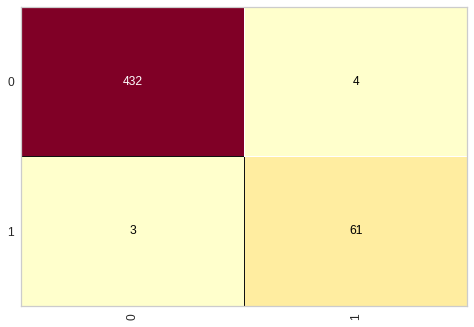

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



# Base census - 82.90%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

NameError: ignored

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
previsoes = knn_census.predict(X_census_teste)

In [ ]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes) # padronização

0.8290685772773797

0.8290685772773797

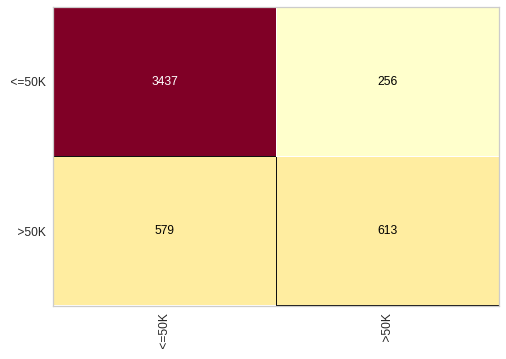

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



# **Regressão logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Base risco de crédito

In [ ]:
import pickle
with open('risco_credito.plk', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito #2, 7, 11 (vamos retirar os moderado da base de dados para trabalhar somente com dois valores)

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
X_risco_credito = np.delete(X_risco_credito, [2,7,11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2,7,11], axis = 0)

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [ ]:
logistic_risco_credit = LogisticRegression(random_state = 1)
logistic_risco_credit.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [ ]:
logistic_risco_credit.intercept_

array([-0.80828993])

In [ ]:
# Coeficiente
logistic_risco_credit.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [ ]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsoes1 = logistic_risco_credit.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes1 

array(['baixo', 'alto'], dtype=object)

# Base credit data - 94.60%

In [ ]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape 

((500, 3), (500,))

In [ ]:
logistic_credit = LogisticRegression(random_state = 1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_credit.intercept_

array([-6.02976095])

In [ ]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [ ]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes 

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



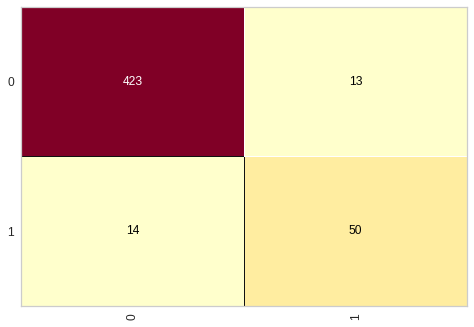

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
print(classification_report(y_credit_teste, previsoes))

# Base census - 84.95%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes 

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.849539406345957

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



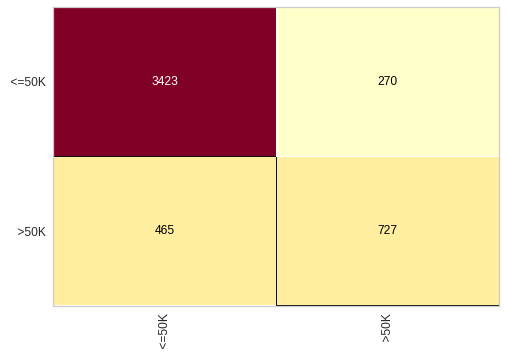

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)
print(classification_report(y_census_teste, previsoes))

# **SVM**

In [ ]:
from sklearn.svm import SVC

# Base credit data - 98.80%

In [ ]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape 

((500, 3), (500,))

In [ ]:
# Kernel = 'linear', 'poly', 'sigmoid', 'rbf'
svm_credit = SVC(kernel='rbf', random_state=1, C=2.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.988

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



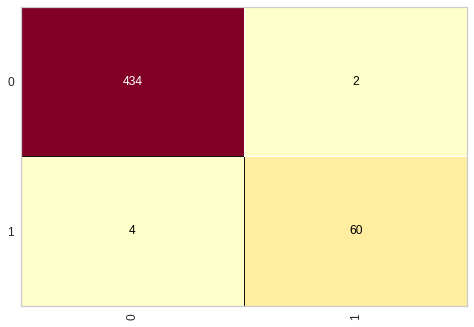

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
print(classification_report(y_credit_teste, previsoes))

# Base census - 85.07%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
# Kernel = 'linear', 'poly', 'sigmoid', 'rbf'
svm_census = SVC(kernel='linear', random_state=1, C=1.0)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



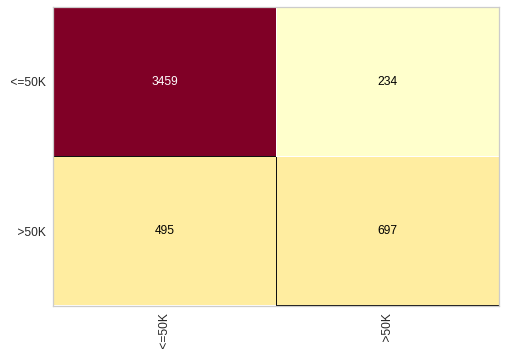

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)
print(classification_report(y_census_teste, previsoes))

# **Redes neurais artificiais**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Base credit data - 99.80%

In [ ]:
import pickle
with open('credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape 

((500, 3), (500,))

In [ ]:
(3+1) / 2

2.0

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.90708245
Iteration 2, loss = 0.81616608
Iteration 3, loss = 0.73868128
Iteration 4, loss = 0.67261155
Iteration 5, loss = 0.61455883
Iteration 6, loss = 0.56278919
Iteration 7, loss = 0.51698497
Iteration 8, loss = 0.47605409
Iteration 9, loss = 0.43974148
Iteration 10, loss = 0.40687228
Iteration 11, loss = 0.37800909
Iteration 12, loss = 0.35151018
Iteration 13, loss = 0.32734396
Iteration 14, loss = 0.30551604
Iteration 15, loss = 0.28503067
Iteration 16, loss = 0.26608425
Iteration 17, loss = 0.24922966
Iteration 18, loss = 0.23392605
Iteration 19, loss = 0.22032649
Iteration 20, loss = 0.20791615
Iteration 21, loss = 0.19668376
Iteration 22, loss = 0.18625142
Iteration 23, loss = 0.17680477
Iteration 24, loss = 0.16800905
Iteration 25, loss = 0.16039507
Iteration 26, loss = 0.15306357
Iteration 27, loss = 0.14638418
Iteration 28, loss = 0.14041550
Iteration 29, loss = 0.13511811
Iteration 30, loss = 0.12986572
Iteration 31, loss = 0.12523186
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.998

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



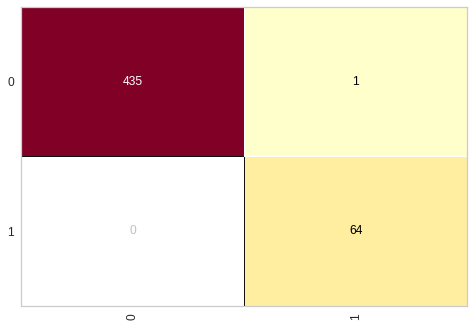

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
print(classification_report(y_credit_teste, previsoes))

# Base census - 81.80%

In [ ]:
import pickle
with open('census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
(108 + 1) / 2

54.5

In [ ]:
# 108 -> 55 -> 55 -> 1
rede_neural_census = MLPClassifier(verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (55,55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.38165787
Iteration 2, loss = 0.32563205
Iteration 3, loss = 0.31445999
Iteration 4, loss = 0.30745860
Iteration 5, loss = 0.30295731
Iteration 6, loss = 0.29844607
Iteration 7, loss = 0.29535818
Iteration 8, loss = 0.29251613
Iteration 9, loss = 0.28990087
Iteration 10, loss = 0.28736458
Iteration 11, loss = 0.28551669
Iteration 12, loss = 0.28301282
Iteration 13, loss = 0.28136187
Iteration 14, loss = 0.28024163
Iteration 15, loss = 0.27806091
Iteration 16, loss = 0.27656060
Iteration 17, loss = 0.27483727
Iteration 18, loss = 0.27332639
Iteration 19, loss = 0.27228515
Iteration 20, loss = 0.27065951
Iteration 21, loss = 0.26917079
Iteration 22, loss = 0.26810586
Iteration 23, loss = 0.26660347
Iteration 24, loss = 0.26478418
Iteration 25, loss = 0.26352601
Iteration 26, loss = 0.26292738
Iteration 27, loss = 0.26072080
Iteration 28, loss = 0.26000310
Iteration 29, loss = 0.25915778
Iteration 30, loss = 0.25712595
Iteration 31, loss = 0.25595627
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.818014329580348

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3693
        >50K       0.63      0.62      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885



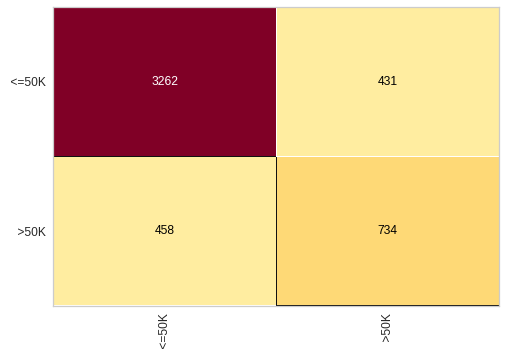

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)
print(classification_report(y_census_teste, previsoes))

# **Avaliação dos algoritmos**


*  Naive Bayes: 93.80%
*  Árvore de decisão: 98.20%
*  Random forest: 98.40%
*  Regras: 98.20%
*  Knn: 98.60%
*  Regressão logística: 94.60%
*  SVM: 98.80%
*  Redes neurais: 99.80%





# **Tuning dos parâmetros com GridSearch**

# Preparação dos dados

In [4]:
# para que o algoritmo encontre um melhor conjuto de parametro, automaticamente ele vai fazer aplicação da validação cruzada.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [5]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [6]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [7]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [8]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [9]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [10]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [11]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

# Árvore de decisão

In [ ]:
#DecisionTreeClassifier()

In [27]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [28]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


# Random forest

In [31]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [32]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
0.9865


# Knn

In [33]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [34]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


# Regressão logística

In [35]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [36]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


# SVM

In [37]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [38]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


# Redes neurais

In [39]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [40]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [41]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9960000000000001


# **Validação Cruzada**

In [97]:
from sklearn.model_selection import cross_val_score, KFold

In [98]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

15


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

16


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

17


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

18


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

19


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

20


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

21


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

22


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

25


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

26


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

27


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

28


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

29


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [99]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

Arvore  Random forest     KNN  Logistica     SVM  Rede neural
0   0.9870         0.9820  0.9815     0.9475  0.9845       0.9970
1   0.9860         0.9880  0.9800     0.9465  0.9840       0.9980
2   0.9905         0.9860  0.9795     0.9470  0.9865       0.9975
3   0.9870         0.9795  0.9780     0.9460  0.9850       0.9965
4   0.9885         0.9840  0.9820     0.9465  0.9850       0.9965
5   0.9885         0.9830  0.9780     0.9465  0.9845       0.9970
6   0.9885         0.9805  0.9805     0.9470  0.9860       0.9960
7   0.9875         0.9855  0.9800     0.9480  0.9850       0.9970
8   0.9855         0.9845  0.9795     0.9465  0.9840       0.9965
9   0.9875         0.9855  0.9820     0.9465  0.9845       0.9975
10  0.9860         0.9840  0.9795     0.9475  0.9840       0.9965
11  0.9895         0.9890  0.9825     0.9480  0.9845       0.9965
12  0.9885         0.9790  0.9825     0.9475  0.9855       0.9965
13  0.9865         0.9835  0.9780     0.9475  0.9855       0.9975
14  0.9845         0.9830  0.9810     0.9485  0.9830       0.9965
15  0.9855         0.9845  0.9790     0.9475  0.9865       0.9980
16  0.9855         0.9825  0.9810     0.9460  0.9860       0.9965
17  0.9905         0.9865  0.9800     0.9470  0.9865       0.9975
18  0.9875         0.9830  0.9805     0.9465  0.9850       0.9975
19  0.9870         0.9865  0.9795     0.9465  0.9845       0.9975
20  0.9840         0.9855  0.9820     0.9465  0.9840       0.9975
21  0.9865         0.9840  0.9825     0.9470  0.9850       0.9970
22  0.9885         0.9855  0.9780     0.9455  0.9865       0.9980
23  0.9875         0.9845  0.9810     0.9465  0.9875       0.9975
24  0.9870         0.9865  0.9795     0.9470  0.9870       0.9980
25  0.9885         0.9840  0.9790     0.9470  0.9820       0.9980
26  0.9880         0.9865  0.9770     0.9475  0.9840       0.9970
27  0.9860         0.9840  0.9785     0.9465  0.9865       0.9970
28  0.9870         0.9805  0.9790     0.9480  0.9835       0.9970
29  0.9880         0.9860  0.9805     0.9465  0.9865       0.9970

In [100]:
resultados.describe()

Arvore  Random forest        KNN  Logistica        SVM  Rede neural
count  30.000000      30.000000  30.000000  30.000000  30.000000    30.000000
mean    0.987283       0.984233   0.980050   0.946950   0.985083     0.997133
std     0.001557       0.002359   0.001533   0.000687   0.001280     0.000571
min     0.984000       0.979000   0.977000   0.945500   0.982000     0.996000
25%     0.986125       0.983000   0.979000   0.946500   0.984125     0.996500
50%     0.987250       0.984250   0.980000   0.947000   0.985000     0.997000
75%     0.988500       0.985875   0.981000   0.947500   0.986375     0.997500
max     0.990500       0.989000   0.982500   0.948500   0.987500     0.998000

In [101]:
# variação
resultados.var()

Arvore           2.425575e-06
Random forest    5.564368e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      3.264368e-07
dtype: float64

In [102]:
#coeficiencia de vairação
(resultados.std() / resultados.mean()) * 100

Arvore           0.157749
Random forest    0.239668
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.057299
dtype: float64

# Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [103]:
alpha = 0.05

In [104]:
from scipy.stats import shapiro

In [105]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9733832478523254, 0.6352427005767822),
 (0.9654761552810669, 0.4238479435443878),
 (0.9584026336669922, 0.28181564807891846),
 (0.9370993375778198, 0.07600117474794388),
 (0.962294340133667, 0.35407164692878723),
 (0.9049677848815918, 0.011134237051010132))

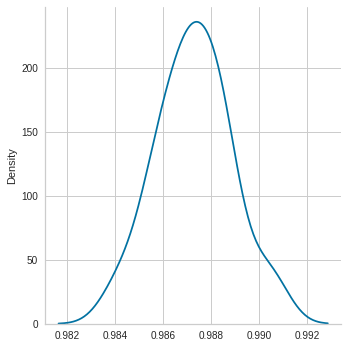

In [106]:
sns.displot(resultados_arvore, kind = 'kde');

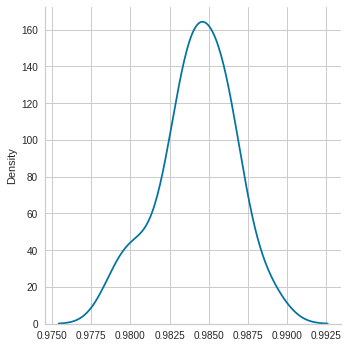

In [107]:
sns.displot(resultados_random_forest, kind = 'kde');

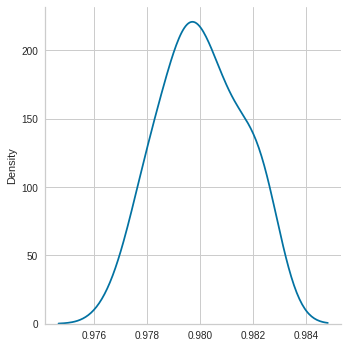

In [108]:
sns.displot(resultados_knn, kind = 'kde');

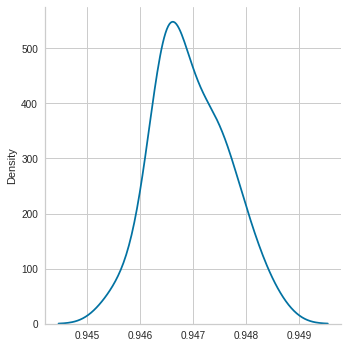

In [109]:
sns.displot(resultados_logistica, kind = 'kde');

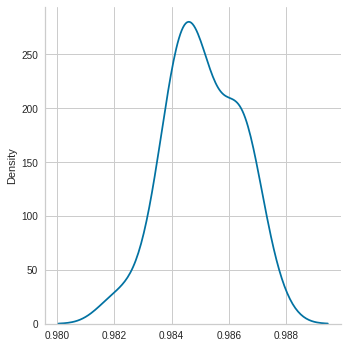

In [110]:
sns.displot(resultados_svm, kind = 'kde');

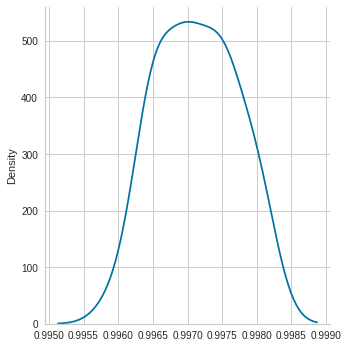

In [111]:
sns.displot(resultados_rede_neural, kind = 'kde');

# Teste de hipótese com ANOVA e Tukey

In [112]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

In [114]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [115]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [116]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

accuracy    algoritmo
0      0.9870       arvore
1      0.9860       arvore
2      0.9905       arvore
3      0.9870       arvore
4      0.9885       arvore
..        ...          ...
175    0.9980  rede_neural
176    0.9970  rede_neural
177    0.9970  rede_neural
178    0.9970  rede_neural
179    0.9970  rede_neural

[180 rows x 2 columns]

In [117]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [118]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [119]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0072  0.001 -0.0083 -0.0061   True
       arvore     logistica  -0.0403  0.001 -0.0414 -0.0392   True
       arvore random_forest   -0.003  0.001 -0.0041  -0.002   True
       arvore   rede_neural   0.0098  0.001  0.0088  0.0109   True
       arvore           svm  -0.0022  0.001 -0.0033 -0.0011   True
          knn     logistica  -0.0331  0.001 -0.0342  -0.032   True
          knn random_forest   0.0042  0.001  0.0031  0.0053   True
          knn   rede_neural   0.0171  0.001   0.016  0.0182   True
          knn           svm    0.005  0.001  0.0039  0.0061   True
    logistica random_forest   0.0373  0.001  0.0362  0.0384   True
    logistica   rede_neural   0.0502  0.001  0.0491  0.0513   True
    logistica           svm   0.0381  0.001   0.037  0.0392   

In [120]:
resultados.mean()

Arvore           0.987283
Random forest    0.984233
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997133
dtype: float64

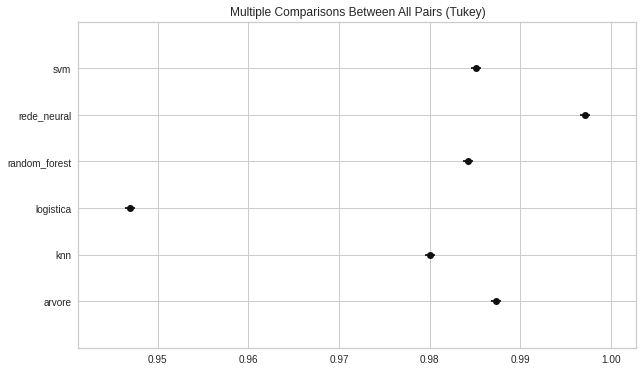

In [121]:
teste_estatistico.plot_simultaneous();

# **Salvar um classificador já treinado**

In [122]:
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [123]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [124]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [125]:
# Escolhemos os três melhores algoritmos conforme o gráfico logo acima.
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [126]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(batch_size=56)

In [127]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [128]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [129]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# **Carregar um classificador já treinado**

In [130]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [131]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [132]:
novo_registro.shape

(3,)

In [133]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [134]:
novo_registro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [135]:
rede_neural.predict(novo_registro)

array([1])

In [136]:
arvore.predict(novo_registro)

array([1])

In [137]:
svm.predict(novo_registro)

array([1])

# **Combinação de classificadores**

In [138]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [139]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [140]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [141]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o empréstimo')

Cliente não pagará o empréstimo


# **Rejeição de classificadores**

In [142]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [143]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [144]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [145]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.08082561e-04, 9.99891917e-01]])

In [146]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9998919174393668

In [147]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [148]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9933877516843274

In [149]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o empréstimo, baseado em 1 algoritmos
